# Excercise 9.2

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## 1D Self-Organizing Maps for 3D data

In [60]:
import numpy as np

X = np.loadtxt("spiral.csv", skiprows=1, usecols=(1,2,3), delimiter=",").T
np.random.shuffle(X.T)

Text(0.5, 0, 'z')

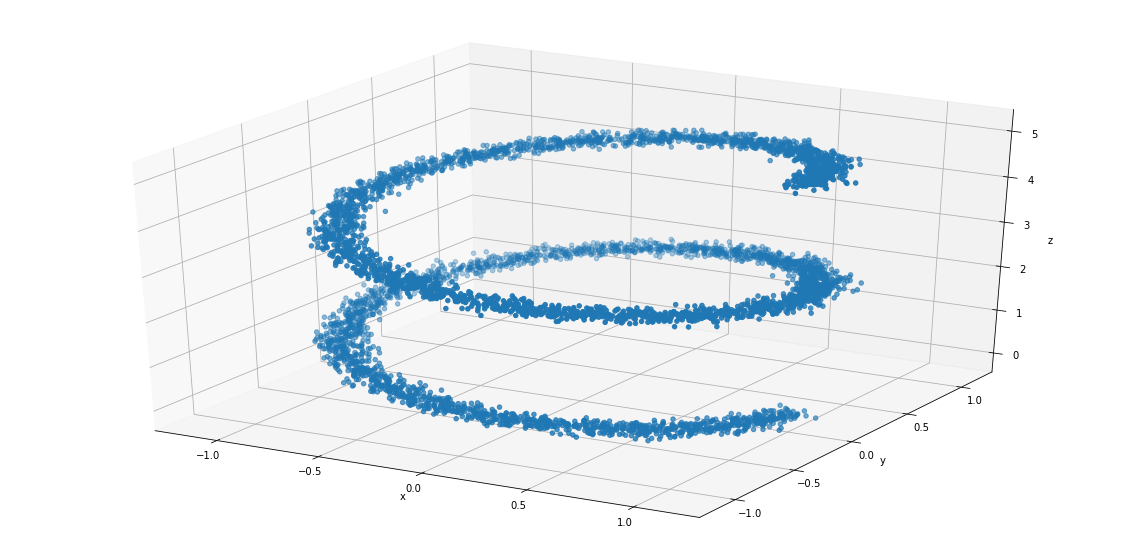

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plot_3d = plt.figure(figsize=(20,10)).gca(projection='3d')
plot_3d.scatter(*X)
plot_3d.set_xlabel('x')
plot_3d.set_ylabel('y')
plot_3d.set_zlabel('z')

In [55]:
def initialize_som_prototypes(M, min_z=0, max_z=5):
    x = np.full(M, 0)
    y = np.full(M, 0)
    z = np.linspace(min_z, max_z, M)
    return np.stack((x, y, z))

initialize_som_prototypes(6)

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 1., 2., 3., 4., 5.]])

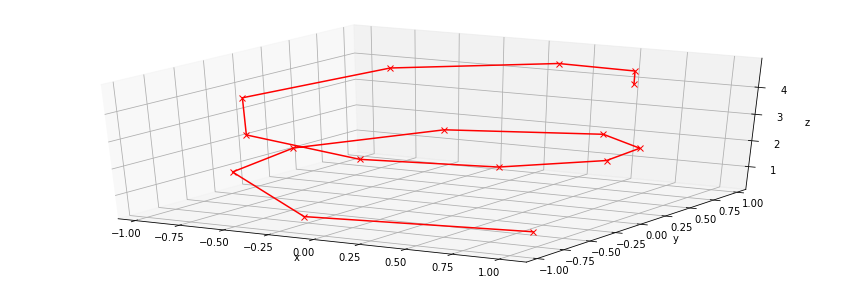

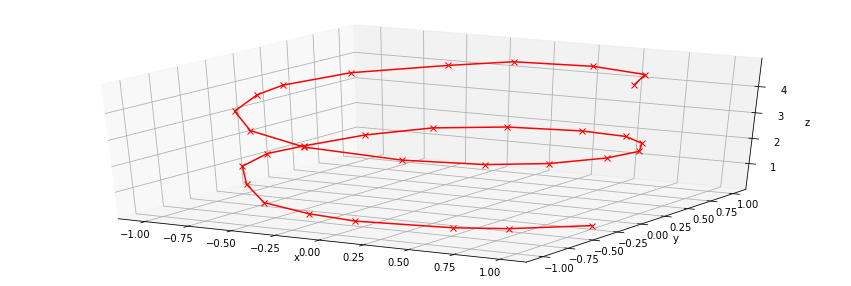

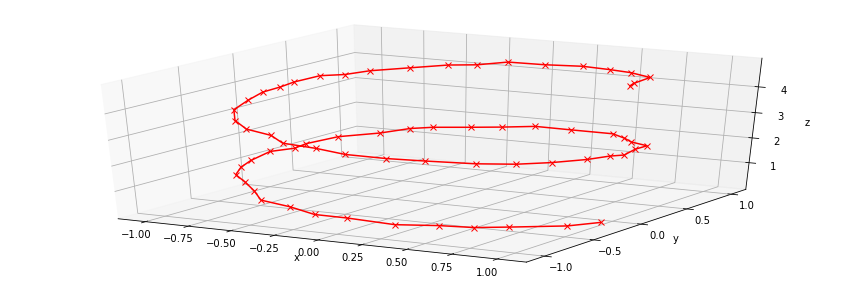

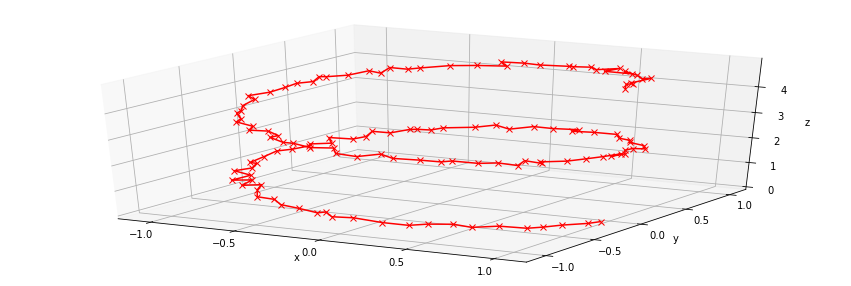

In [58]:
from lib.som import som_online

Ms = [2**n for n in np.arange(4, 8)]

for i, M in zip(np.arange(len(Ms)), Ms):
    w0 = initialize_som_prototypes(M)
    w, epsilon_history, sigma_history, w_history = som_online(
        X=X, M=M, w0=w0, epsilon0=0.3, sigma0=10, epsilon_plateau=0.5, decay_epsilon=0.99, decay_sigma=0.995
    )
    
    plot_3d = plt.figure(figsize=(15,5)).gca(projection='3d')
    # plot_3d.scatter(*X, alpha=0.1)
    plot_3d.set_xlabel('x')
    plot_3d.set_ylabel('y')
    plot_3d.set_zlabel('z')
    
    plot_3d.plot(w[0], w[1], w[2], "rx-")